# The shortest chain which contains all hexamers from all 4 bases (A,T,C,G).
### Wiki/[GC content](https://en.wikipedia.org/wiki/GC-content)


In [1]:
# packages
import numpy as np

# functions
from functions import *

In [10]:
# Generate all possible hexamers:
hexamers = generate_k_mer_list('ACTG', 7)

#### Randomizations is needed better for G-C ratio.
# Find a good seed for randomization
# Tested in interval [0, 1000] -> best: 336
best_seed = 336 # run_seed_simulation(0, 1000)
np.random.seed(best_seed) # random seed for reproduction
np.random.shuffle(hexamers)

In [23]:
num_of_reads, min_overlap = 100, 3
reads, skipped_hexamers = generate_reads_v3(hexamers, num_of_reads=num_of_reads, min_overlap=min_overlap, max_while_counter=20)
gc_content_in_reads, pct_in_tol_intervall_for_reads = calculate_GC_content(reads)
reads = [read for _, read in sorted(zip(pct_in_tol_intervall_for_reads, reads))]

Cannot append more k-mers after 9 loop.                     
Number of skipped k-mers: 251                      


In [24]:
np.vectorize(len)(reads) 

array([192, 202, 184, 183, 196, 216, 202, 172, 207, 187, 184, 205, 183,
       212, 200, 166, 175, 219, 213, 188, 183, 189, 199, 190, 180, 199,
       193, 186, 196, 192, 178, 180, 199, 201, 196, 217, 218, 205, 185,
       214, 196, 187, 199, 223, 215, 202, 193, 195, 196, 193, 186, 192,
       217, 181, 174, 187, 193, 193, 194, 202, 210, 205, 162, 184, 169,
       194, 162, 181, 181, 183, 218, 172, 183, 204, 153, 211, 192, 197,
       178, 198, 205, 173, 186, 190, 215, 172, 177, 204, 179, 208, 211,
       213, 214, 189, 195, 175, 188, 189, 200, 202, 202, 204, 179, 189,
       189, 191, 195, 197, 201, 232, 206, 208, 220, 220, 223, 169, 181,
       205, 230, 211])

### Append the skipped hexamers to the reads
~~Try to get a better G-C ratio for reads~~\
Complement shortest reads.

In [25]:
def append_skipped_k_mers(reads, skipped_k_mers):
    ''' Append skipped k-mers to the stast of the worst scored reads '''
    #gc_content_in_skipped_hex, pct_in_tol_intervall_for_skipped_hex =  calculate_GC_content(skipped_k_mers)
    
    k_mer_idx = 0
    for i in range(len(reads)):
        while k_mer_idx < len(skipped_hexamers):
            
            if len(reads[i]) + len(skipped_hexamers[k_mer_idx]) <=240:
                reads[i] += skipped_hexamers[i]
                k_mer_idx +=1
            else:
                break
    
    return reads


In [26]:
 #gc_content_in_skipped_hex, pct_in_tol_intervall_for_skipped_hex =  calculate_GC_content(skipped_hexamers)


In [27]:
supplemended_reads = append_skipped_k_mers(reads, skipped_hexamers)


---

In [28]:
# recalculate G-C content
gc_content_in_reads, pct_in_tol_intervall = calculate_GC_content(reads)
print(f'The score of simulation (mean +/- std) = ({np.mean(pct_in_tol_intervall)*100:.2f} +/- {np.std(pct_in_tol_intervall)*100:.2f}) %')

The score of simulation (mean +/- std) = (89.77 +/- 10.31) %


The first five most incorrect reads:


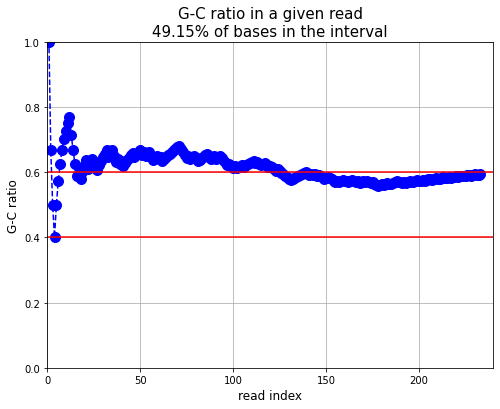

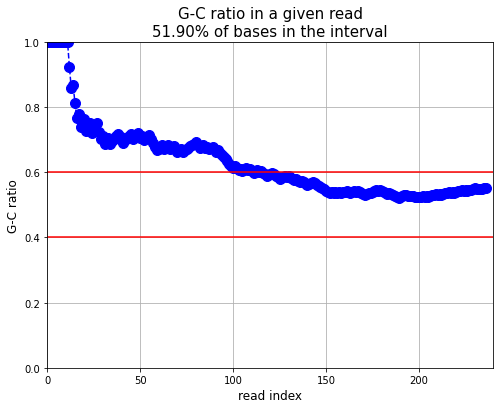

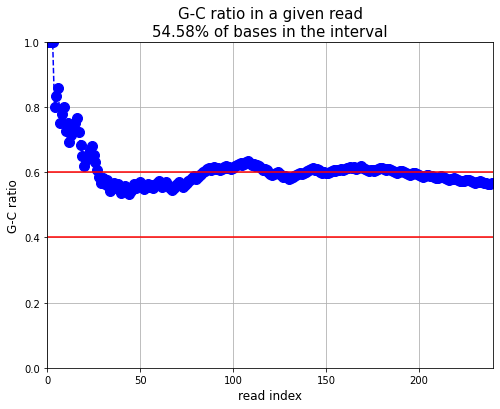

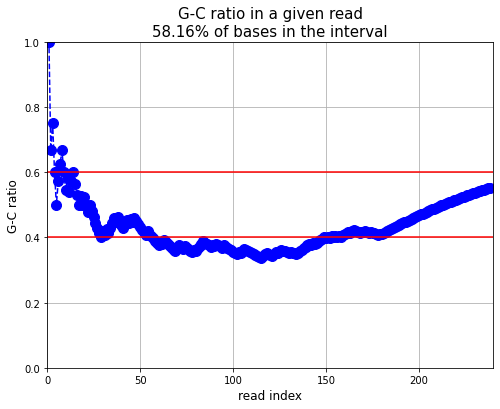

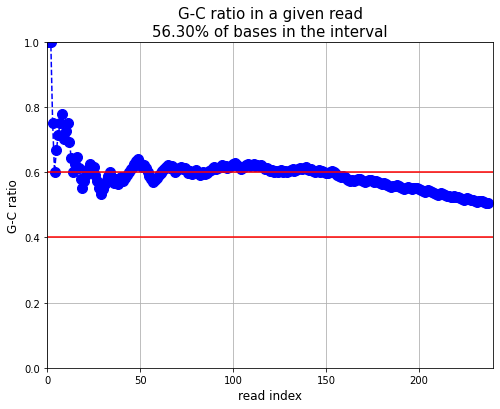

In [29]:
print('The first five most incorrect reads:')
for i in range(5):
    plot_gc_ratio_for_a_read(gc_content_in_reads[i], pct_in_tol_intervall[i])

The first five best reads:


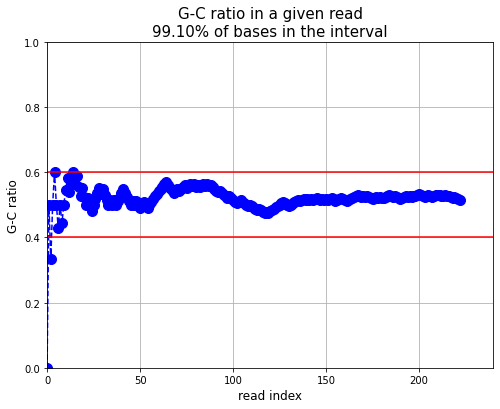

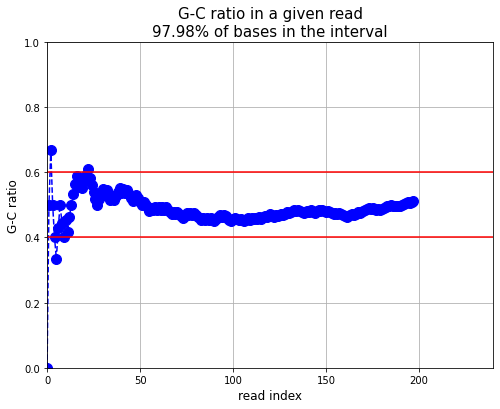

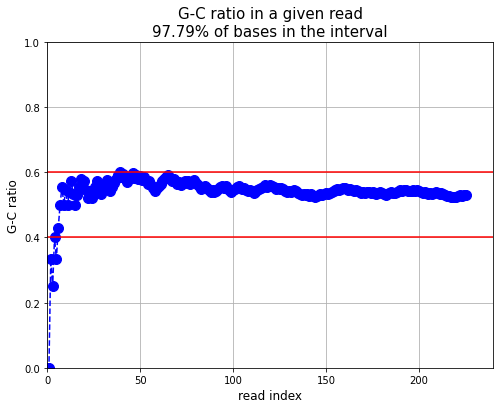

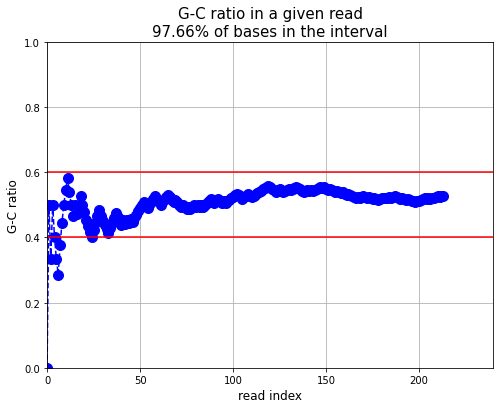

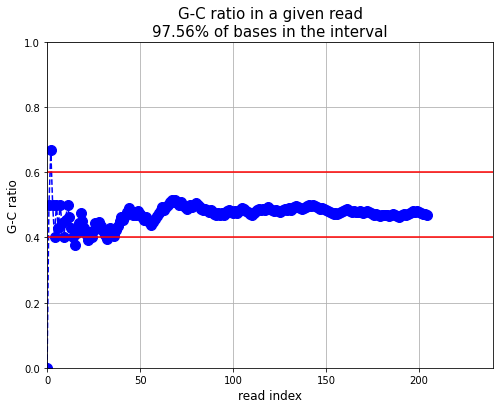

In [9]:
print('The first five best reads:')
for i in range(1,6): 
    plot_gc_ratio_for_a_read(gc_content_in_reads[-i], pct_in_tol_intervall[-i])